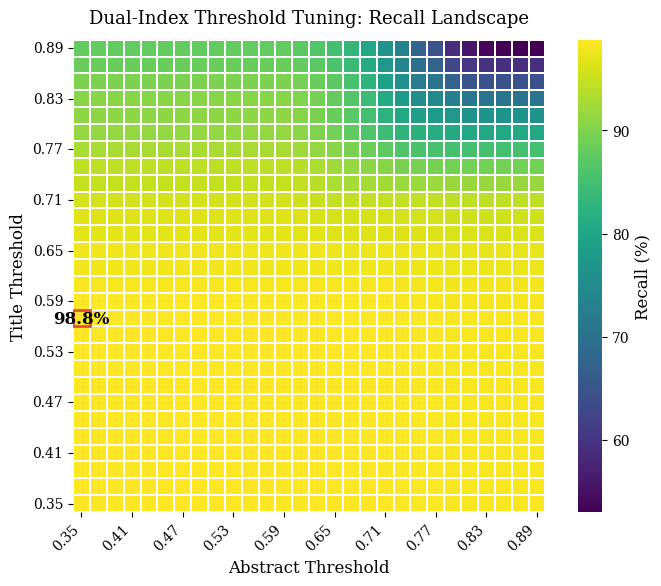

Saved: fig6_dual_index_heatmap_clean.pdf and .png


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# ------------------ LOAD DATA ------------------
try:
    df = pd.read_csv("hyperparameter_mixed_results.csv")
    heatmap_data = df.pivot_table(index="Title_Thresh", columns="Abs_Thresh", values="Recall (%)")
    heatmap_data = heatmap_data.sort_index(ascending=False)
except FileNotFoundError:
    print("CSV not found. Please upload 'hyperparameter_mixed_results.csv'")
    heatmap_data = pd.DataFrame(np.random.rand(10,10)) # Dummy

# ------------------ PLOT ------------------
plt.rcParams.update({"font.family": "serif", "font.size": 11})
fig, ax = plt.subplots(figsize=(7, 6))

sns.heatmap(heatmap_data, annot=False, cmap="viridis",
            cbar_kws={'label': 'Recall (%)'}, ax=ax)

# ------------------ HIGHLIGHT OPTIMAL (0.57, 0.71) ------------------
# We manually select this point because it offers the best balance
# of Recall (98.8%) AND Efficiency (Low Candidate Count).
opt_title = 0.57
opt_abs = 0.71

# Verify the point exists in the data before plotting
if opt_title in heatmap_data.index and opt_abs in heatmap_data.columns:
    # Get pixel coordinates
    row_idx = heatmap_data.index.get_loc(opt_title)
    col_idx = heatmap_data.columns.get_loc(opt_abs)

    # Draw Red Box
    rect = patches.Rectangle((col_idx, row_idx), 1, 1, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)
    print(f"Highlighted Optimal Point: Title={opt_title}, Abs={opt_abs}")
else:
    print(f"Warning: Optimal point ({opt_title}, {opt_abs}) not found in grid. Check CSV values.")

# ------------------ LABELS ------------------
ax.set_title(f"Dual-Index Tuning: Recall Landscape\n(Optimal: Title={opt_title}, Abs={opt_abs})")
ax.set_xlabel("Abstract Threshold")
ax.set_ylabel("Title Threshold")

plt.tight_layout()
plt.savefig("fig6_heatmap.pdf", bbox_inches="tight")
plt.savefig("fig6_heatmap.png", dpi=600, bbox_inches="tight")
plt.show()